In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
from Classification_Trees.Packages.data import load_csv_to_dataframe

In [4]:
df = load_csv_to_dataframe('./Data/data.csv')

In [5]:
df = df.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_cat'], axis=1)
data = pd.get_dummies(df, drop_first=True)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_cat,MonthlyCharges_cat,TotalCharges_cat
0,Female,No,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,1,5,1
1,Male,No,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,1,4,1
2,Male,Yes,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,1,6,1
3,Male,Yes,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,2,8,2
4,Female,Yes,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,1,7,1


Question: "Multiple Lines" : Answers, ["yes", "no", "no phone service"] - do 1 or more lines matter?
Could be changed to "Phone Line" : Answers, ["yes", "no"]

Question: "Internet Service" : Answers, ["DSL", "Fiber", "No internet service"] - does DSL vs Fiber matter?
Could be changed to "Internet Service" : Answers, ["yes", "no"]

Question: "

Move answeres "No internet service" to "No" (apart from Q: Internet Service?) and move "No phone service" to "No"

In [7]:
numeric_cols = ['tenure','MonthlyCharges','TotalCharges']
categorical_cols = ['gender','SeniorCitizen','Partner','Dependents', 'tenure_cat', 'PhoneService','MultipleLines','InternetService',
               'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
               'Contract','PaperlessBilling','PaymentMethod', 'Churn']

for column in df.columns:
    if df[column].dtypes == 'O':
        df[column] = df[column].astype('category')

for column in df.columns:
    if df[column].dtypes == 'int64' or df[column].dtypes =='float64':
        continue
    else:        
        print('*'*42)
        print(df[column].value_counts())
        print('*'*42)

for column in categorical_cols:

    print(column)
    print('-'*18)
    print(df[column].value_counts())
    # print(f"Sum of Multiple Lines for each category: {df[column].value_counts().sum()}")
    
    tmp = df[[column, 'Churn_cat']].groupby(column).sum()
    print(tmp['Churn_cat'])
    
    print('*'*38)

    print("Percentage")
    #print('-'*28)
    print(df[column].value_counts() / len(df))

    print('*'*38)
    
    print(f"Percentage of Churn for each category: {tmp['Churn_cat'] / tmp['Churn_cat'].sum()}")
    print('*'*38)
#     print("Percentage of each total for Churn=yes")
#     print('-'*28)
#     tmp['Churn_cat'] / df[column].value_counts()
    print("+="*25)

In [8]:
churn_df = df[df['Churn']=='Yes']
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_cat,MonthlyCharges_cat,TotalCharges_cat
2,Male,Yes,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,1,6,1
3,Male,Yes,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,2,8,2
4,Female,Yes,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,1,7,1
18,Male,Yes,No,No,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Credit card (automatic),Yes,5,5,3
19,Male,Yes,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,1,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
gender                7032 non-null object
SeniorCitizen         7032 non-null object
Partner               7032 non-null object
Dependents            7032 non-null object
PhoneService          7032 non-null object
MultipleLines         7032 non-null object
InternetService       7032 non-null object
OnlineSecurity        7032 non-null object
OnlineBackup          7032 non-null object
DeviceProtection      7032 non-null object
TechSupport           7032 non-null object
StreamingTV           7032 non-null object
StreamingMovies       7032 non-null object
Contract              7032 non-null object
PaperlessBilling      7032 non-null object
PaymentMethod         7032 non-null object
Churn                 7032 non-null object
tenure_cat            7032 non-null int32
MonthlyCharges_cat    7032 non-null int32
TotalCharges_cat      7032 non-null int32
dtypes: int32(3), object(17)
memory 

In [10]:
df.groupby('tenure_cat').size()

tenure_cat
1    1959
2     908
3     763
4     645
5     652
6     698
7    1407
dtype: int64

## Pie charts comparing all data with Churn=Yes

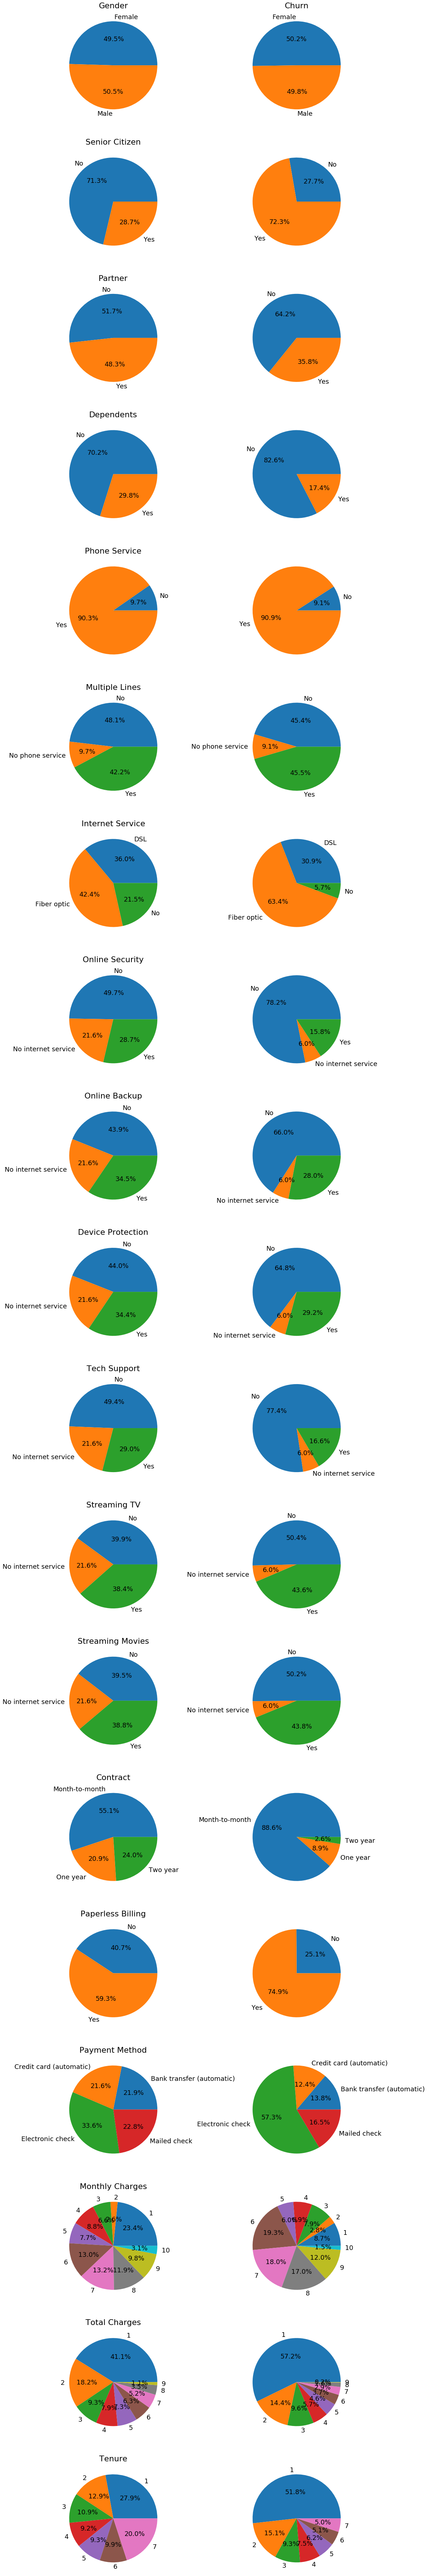

In [11]:
fig, ax = plt.subplots(19,2, figsize=(15,100))

ax[0,0].pie(df.groupby('gender').size(), labels=df.groupby('gender').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[0,1].pie(churn_df.groupby('gender').size(), labels=churn_df.groupby('gender').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[1,0].pie(df.groupby('SeniorCitizen').size(), labels=df.groupby('SeniorCitizen').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[1,1].pie(churn_df.groupby('SeniorCitizen').size(), labels=churn_df.groupby('SeniorCitizen').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[2,0].pie(df.groupby('Partner').size(), labels=df.groupby('Partner').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[2,1].pie(churn_df.groupby('Partner').size(), labels=churn_df.groupby('Partner').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[3,0].pie(df.groupby('Dependents').size(), labels=df.groupby('Dependents').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[3,1].pie(churn_df.groupby('Dependents').size(), labels=churn_df.groupby('Dependents').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[4,0].pie(df.groupby('PhoneService').size(), labels=df.groupby('PhoneService').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[4,1].pie(churn_df.groupby('PhoneService').size(), labels=churn_df.groupby('PhoneService').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[5,0].pie(df.groupby('MultipleLines').size(), labels=df.groupby('MultipleLines').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[5,1].pie(churn_df.groupby('MultipleLines').size(), labels=churn_df.groupby('MultipleLines').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[6,0].pie(df.groupby('InternetService').size(), labels=df.groupby('InternetService').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[6,1].pie(churn_df.groupby('InternetService').size(), labels=churn_df.groupby('InternetService').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[7,0].pie(df.groupby('OnlineSecurity').size(), labels=df.groupby('OnlineSecurity').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[7,1].pie(churn_df.groupby('OnlineSecurity').size(), labels=churn_df.groupby('OnlineSecurity').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[8,0].pie(df.groupby('OnlineBackup').size(), labels=df.groupby('OnlineBackup').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[8,1].pie(churn_df.groupby('OnlineBackup').size(), labels=churn_df.groupby('OnlineBackup').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[9,0].pie(df.groupby('DeviceProtection').size(), labels=df.groupby('DeviceProtection').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[9,1].pie(churn_df.groupby('DeviceProtection').size(), labels=churn_df.groupby('DeviceProtection').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[10,0].pie(df.groupby('TechSupport').size(), labels=df.groupby('TechSupport').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[10,1].pie(churn_df.groupby('TechSupport').size(), labels=churn_df.groupby('TechSupport').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[11,0].pie(df.groupby('StreamingTV').size(), labels=df.groupby('StreamingTV').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[11,1].pie(churn_df.groupby('StreamingTV').size(), labels=churn_df.groupby('StreamingTV').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[12,0].pie(df.groupby('StreamingMovies').size(), labels=df.groupby('StreamingMovies').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[12,1].pie(churn_df.groupby('StreamingMovies').size(), labels=churn_df.groupby('StreamingMovies').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[13,0].pie(df.groupby('Contract').size(), labels=df.groupby('Contract').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[13,1].pie(churn_df.groupby('Contract').size(), labels=churn_df.groupby('Contract').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[14,0].pie(df.groupby('PaperlessBilling').size(), labels=df.groupby('PaperlessBilling').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[14,1].pie(churn_df.groupby('PaperlessBilling').size(), labels=churn_df.groupby('PaperlessBilling').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[15,0].pie(df.groupby('PaymentMethod').size(), labels=df.groupby('PaymentMethod').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[15,1].pie(churn_df.groupby('PaymentMethod').size(), labels=churn_df.groupby('PaymentMethod').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[16,0].pie(df.groupby('MonthlyCharges_cat').size(), labels=df.groupby('MonthlyCharges_cat').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[16,1].pie(churn_df.groupby('MonthlyCharges_cat').size(), labels=churn_df.groupby('MonthlyCharges_cat').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[17,0].pie(df.groupby('TotalCharges_cat').size(), labels=df.groupby('TotalCharges_cat').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[17,1].pie(churn_df.groupby('TotalCharges_cat').size(), labels=churn_df.groupby('TotalCharges_cat').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[18,0].pie(df.groupby('tenure_cat').size(), labels=df.groupby('tenure_cat').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})
ax[18,1].pie(churn_df.groupby('tenure_cat').size(), labels=churn_df.groupby('tenure_cat').size().index, autopct='%1.1f%%', textprops={'fontsize': 18})

ax[0,0].set_title('Gender', fontsize=22)
ax[0,1].set_title('Churn', fontsize=22)
ax[1,0].set_title('Senior Citizen', fontsize=22)
#ax[1,1].set_title('Churn', fontsize=22)
ax[2,0].set_title('Partner', fontsize=22)
ax[3,0].set_title('Dependents', fontsize=22)
ax[4,0].set_title('Phone Service', fontsize=22)
ax[5,0].set_title('Multiple Lines', fontsize=22)
ax[6,0].set_title('Internet Service', fontsize=22)
ax[7,0].set_title('Online Security', fontsize=22)
ax[8,0].set_title('Online Backup', fontsize=22)
ax[9,0].set_title('Device Protection', fontsize=22)
ax[10,0].set_title('Tech Support', fontsize=22)
ax[11,0].set_title('Streaming TV', fontsize=22)
ax[12,0].set_title('Streaming Movies', fontsize=22)
ax[13,0].set_title('Contract', fontsize=22)
ax[14,0].set_title('Paperless Billing', fontsize=22)
ax[15,0].set_title('Payment Method', fontsize=22)
ax[16,0].set_title('Monthly Charges', fontsize=22)
ax[17,0].set_title('Total Charges', fontsize=22)
ax[18,0].set_title('Tenure', fontsize=22)


fig.tight_layout(pad=2.0)

plt.show()

In [12]:
df.corr()

,tenure_cat,MonthlyCharges_cat,TotalCharges_cat
tenure_cat,1.000000,0.244179,0.798500
MonthlyCharges_cat,0.244179,1.000000,0.646725
TotalCharges_cat,0.798500,0.646725,1.000000


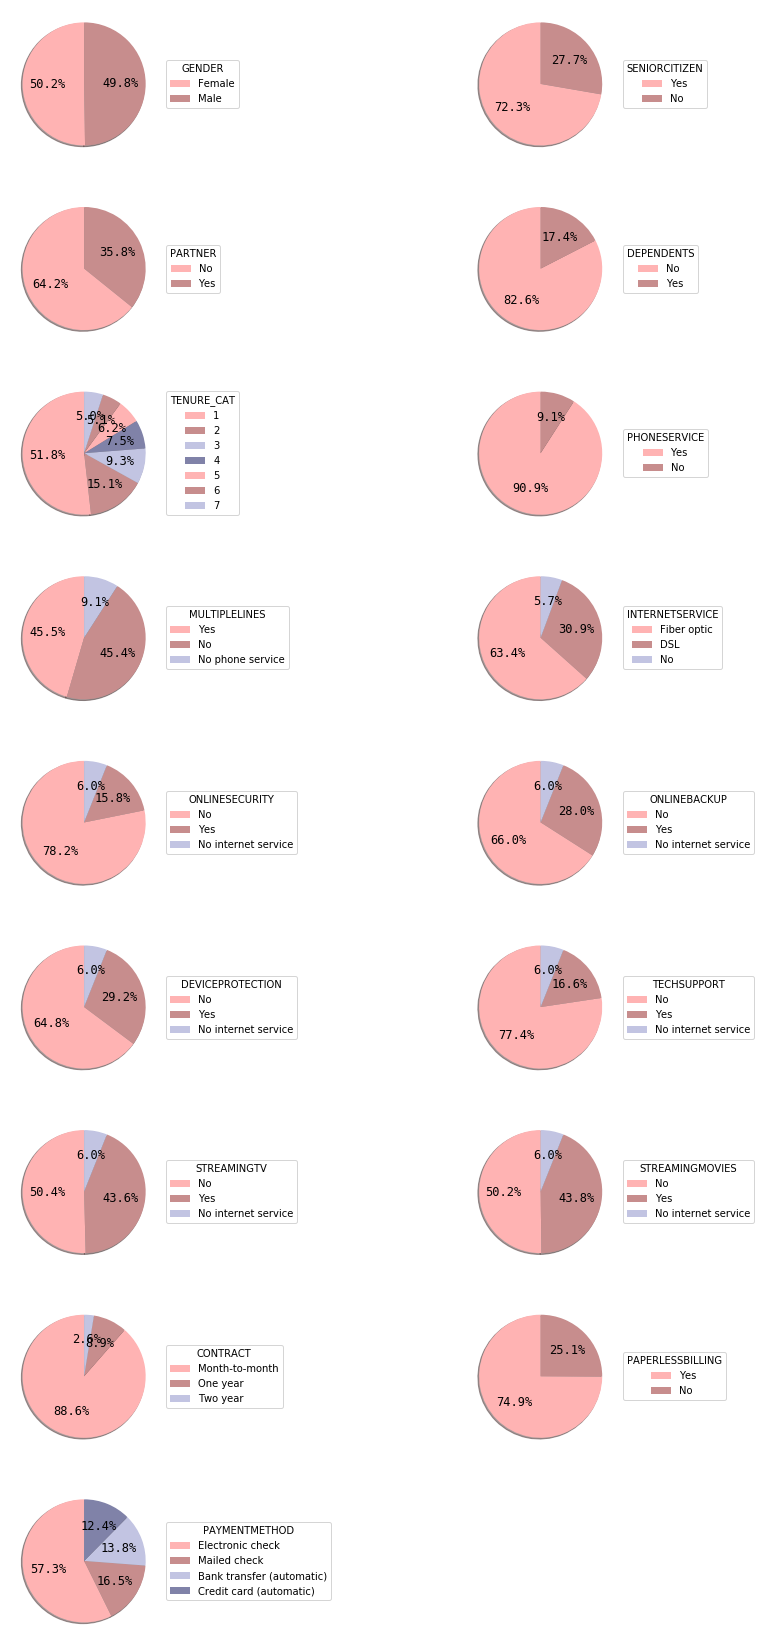

In [13]:
plt.figure(figsize=(15,30))
for i in range(1,len(categorical_cols)):
    plt.subplot(len(categorical_cols)/2,2,i)
    labels = churn_df[categorical_cols[i-1]].value_counts().index
    sizes = churn_df[categorical_cols[i-1]].value_counts().values

    colors = ["#ffb3b3",'#c78d8d',"#C2C4E2",'#8082a8']
    plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True,
            startangle=90, textprops={"fontsize":12, 'fontfamily':'monospace'})
    plt.legend(labels,
               loc='center left',
               title="{}".format(categorical_cols[i-1].upper()),
               bbox_to_anchor=(1, 0, 0.5, 1))

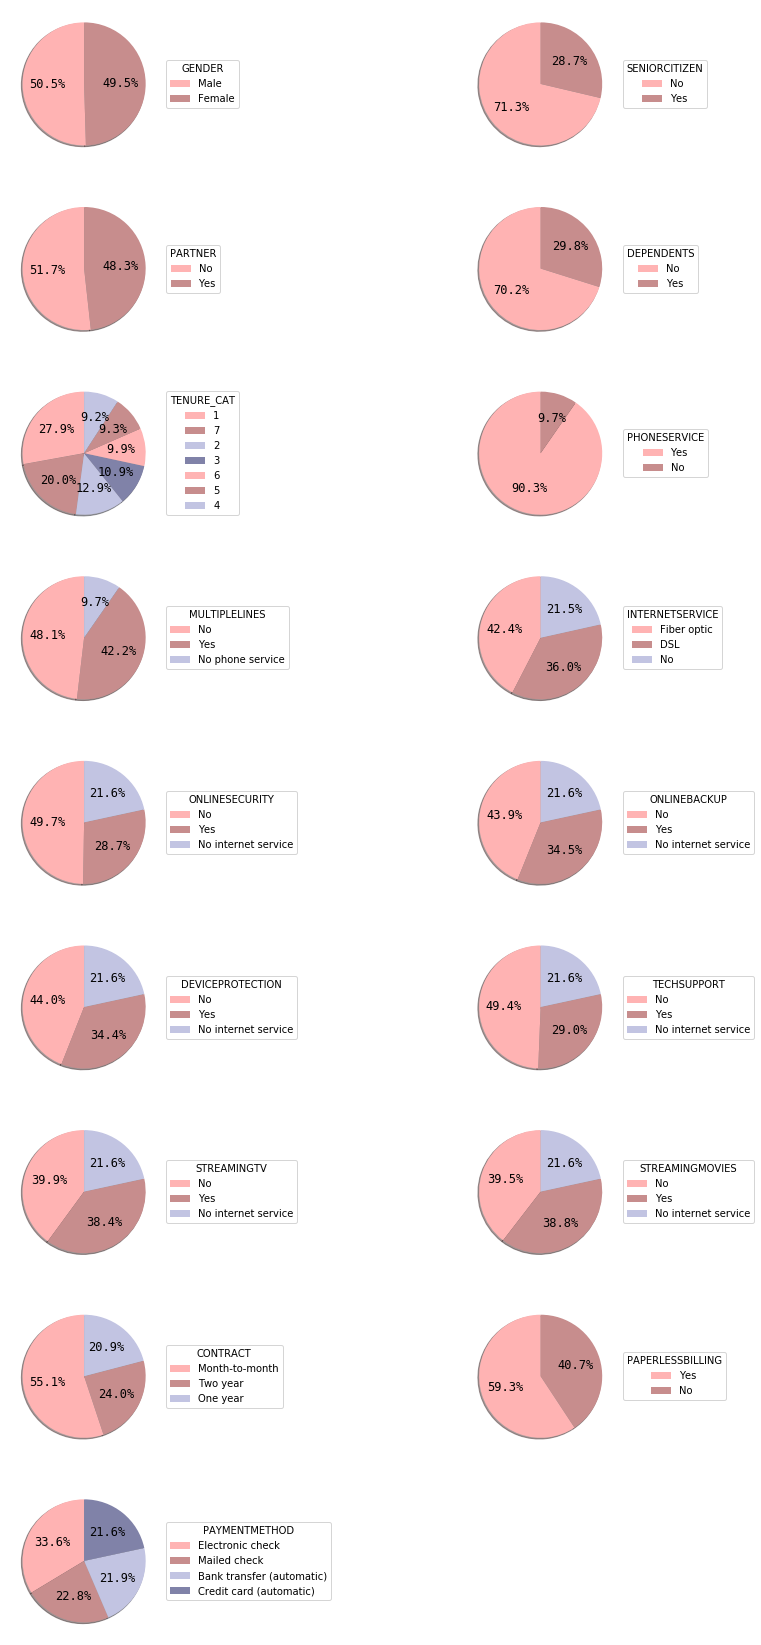

In [14]:
plt.figure(figsize=(15,30))
for i in range(1,len(categorical_cols)):
    plt.subplot(len(categorical_cols)/2,2,i)
    labels = df[categorical_cols[i-1]].value_counts().index
    sizes = df[categorical_cols[i-1]].value_counts().values

    colors = ["#ffb3b3",'#c78d8d',"#C2C4E2",'#8082a8']
    plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True,
            startangle=90, textprops={"fontsize":12, 'fontfamily':'monospace'})
    plt.legend(labels,
               loc='center left',
               title="{}".format(categorical_cols[i-1].upper()),
               bbox_to_anchor=(1, 0, 0.5, 1))

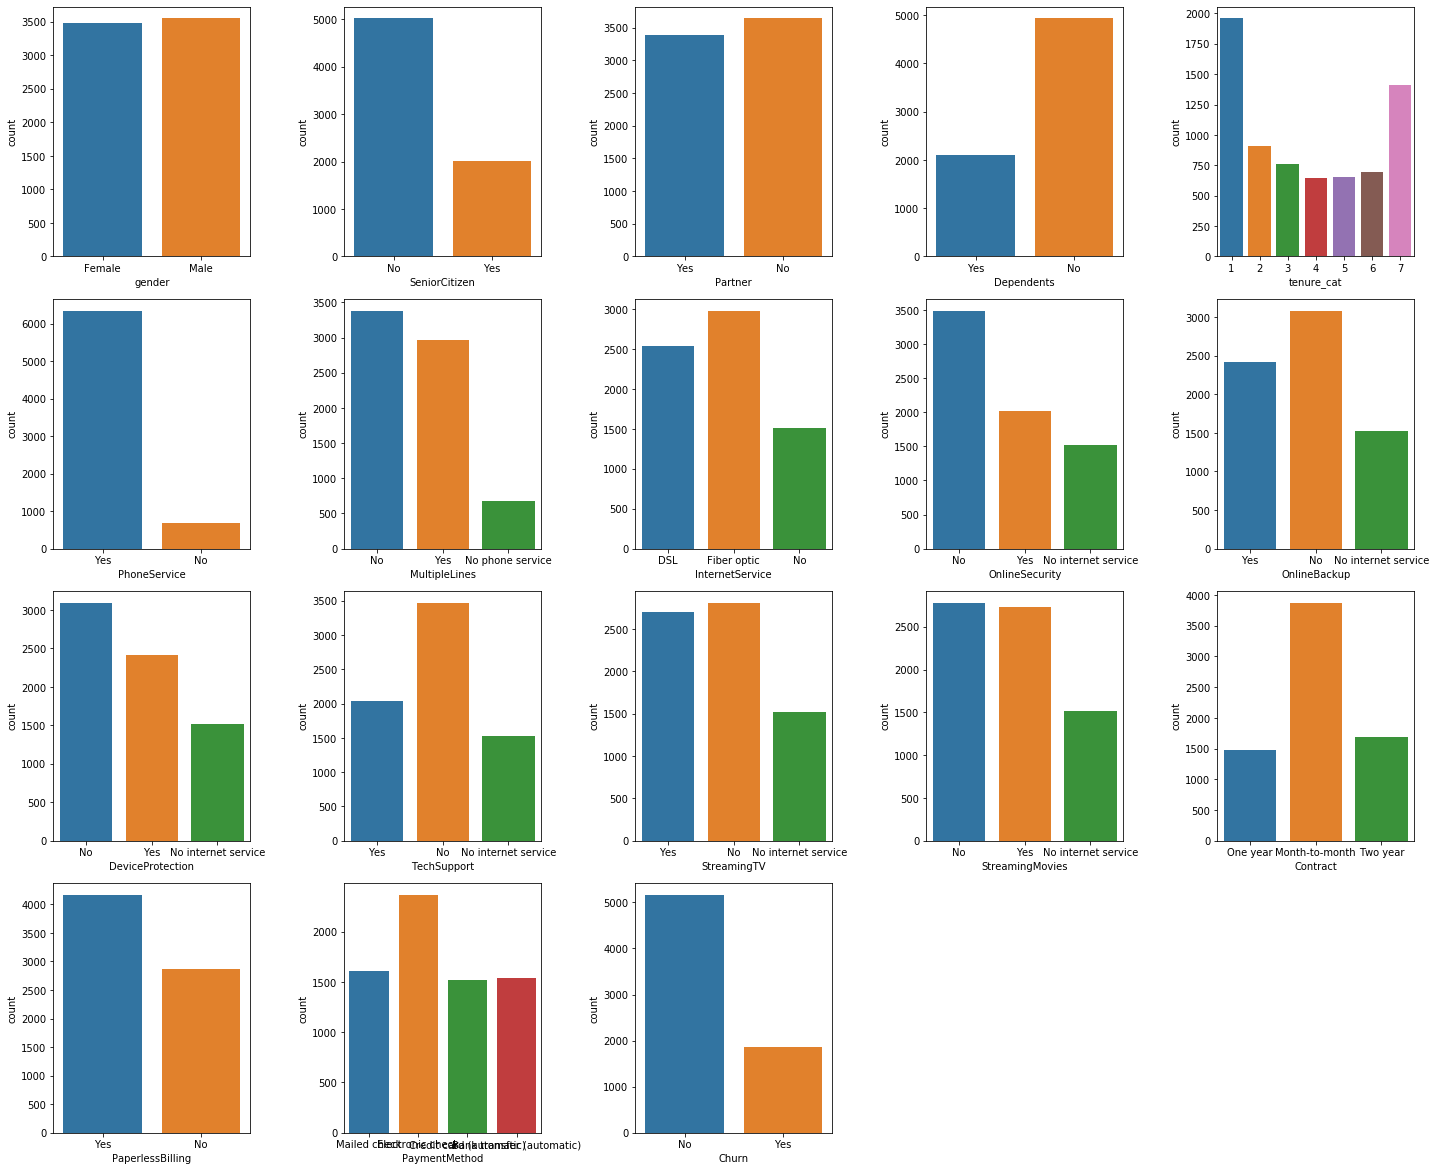

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

In [15]:
fig=plt.figure(figsize=(20, 20))
j = 1
for i in categorical_cols:    
    ax=fig.add_subplot(5, 5, j)
    j = j + 1
    plt.figure(figsize=(2, 2))
    sns.countplot(x=i, data=df, ax=ax)  # 
    # ax.set_title(i+" Distribution",color='DarkRed')
    # ax.set_yscale('log')
    fig.tight_layout()  
plt.show();

### Plot of Feature categories against 'Churn' : 'yes'.

ValueError: Could not interpret input 'Churn_cat'

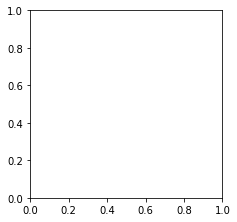

<Figure size 144x144 with 0 Axes>

In [16]:
fig=plt.figure(figsize=(20, 20))
j = 1
for i in categorical_cols:    
    ax=fig.add_subplot(5, 5, j)
    j = j + 1
    plt.figure(figsize=(2, 2))
    sns.barplot(x=i, y='Churn_cat', data=churn_df, ci=None, ax=ax)  # 
    # ax.set_title(i+" Distribution",color='DarkRed')
    # ax.set_yscale('log')
    fig.tight_layout()  
plt.show();

In [ ]:
df['tenure'].hist(bins=20)

In [ ]:
df['MonthlyCharges'].hist(bins=20)

In [ ]:
df['TotalCharges'].hist(bins=20)
print(df['TotalCharges'].min(), df['TotalCharges'].max())

In [ ]:
X = df.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_cat'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Churn_cat']

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr())